# **Explore Data**

This notebook contains code for exploring a smaller version of the dataset locally

This project requires Python 3.7 or above:

In [1]:
import sys
assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [2]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

## Download the Data

In [3]:
import os
import pandas as pd
from pathlib import Path

In [4]:
!export PYSPARK_SUBMIT_ARGS='--packages io.delta:delta-core_2.12:1.0.0 pyspark-shell'

# set up the spark session
import pyspark
from delta import *

builder = pyspark.sql.SparkSession.builder.appName("MyApp") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")

spark = configure_spark_with_delta_pip(builder).getOrCreate()

In [14]:
from pyspark.sql import functions as F

def load_nfl_delta_dataset(dataset_name: str) -> pd.DataFrame:
    '''
    Loads the dataset from the file system with Spark and converts it to a Pandas DataFrame.
    '''
    dataset_path = f"datasets/{dataset_name}"
    if not Path(dataset_path).exists():
        raise FileNotFoundError(f"Dataset {dataset_name} not found at {dataset_path}")
    return spark.read.format("delta").load(dataset_path)\
        .toPandas()

dataset_name = 'gold-set-ne-train'
nfl_df = load_nfl_delta_dataset(dataset_name)

## Take a Quick Look at the Data Structure

In [12]:
nfl_df.head()

,play_id,game_date,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,quarter_seconds_remaining,...,complete_pass_8_play_ma,tackled_for_loss_8_play_ma,run_yards_given_32_play_ma_ffill,defense_tfl_32_play_ma_ffill,pass_yards_given_32_play_ma_ffill,defense_sack_32_play_ma_ffill,defense_qb_hit_32_play_ma_ffill,defense_interception_32_play_ma_ffill,pass_given_up_32_play_ma_ffill,game_month
0,79,2009-09-14,NE,BUF,NE,home,BUF,BUF,49,892,...,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,101,2009-09-14,NE,BUF,NE,home,BUF,BUF,49,887,...,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,122,2009-09-14,NE,BUF,NE,home,BUF,BUF,46,843,...,0.00,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,9
3,146,2009-09-14,NE,BUF,NE,home,BUF,BUF,40,819,...,0.25,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,301,2009-09-14,NE,BUF,NE,home,BUF,NE,83,734,...,0.20,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,9


In [7]:
nfl_df.tail()

,play_id,game_date,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,quarter_seconds_remaining,...,complete_pass_8_play_ma,tackled_for_loss_8_play_ma,run_yards_given_32_play_ma_ffill,defense_tfl_32_play_ma_ffill,pass_yards_given_32_play_ma_ffill,defense_sack_32_play_ma_ffill,defense_qb_hit_32_play_ma_ffill,defense_interception_32_play_ma_ffill,pass_given_up_32_play_ma_ffill,game_month
9289,3831,2017-12-31,NE,NYJ,NE,home,NYJ,NE,71,319,...,0.000000,0.111111,3.909091,0.151515,4.303030,0.060606,0.151515,0.0,0.424242,12
9290,3853,2017-12-31,NE,NYJ,NE,home,NYJ,NE,71,312,...,0.000000,0.111111,3.909091,0.151515,4.090909,0.060606,0.151515,0.0,0.393939,12
9291,3904,2017-12-31,NE,NYJ,NE,home,NYJ,NE,61,280,...,0.111111,0.111111,3.666667,0.151515,4.090909,0.060606,0.151515,0.0,0.393939,12
9292,3925,2017-12-31,NE,NYJ,NE,home,NYJ,NE,58,237,...,0.111111,0.111111,3.848485,0.121212,4.090909,0.060606,0.151515,0.0,0.393939,12
9293,3946,2017-12-31,NE,NYJ,NE,home,NYJ,NE,56,195,...,0.111111,0.111111,3.848485,0.121212,4.030303,0.060606,0.151515,0.0,0.393939,12


In [15]:
nfl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9294 entries, 0 to 9293
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   play_id                                9294 non-null   int32  
 1   game_date                              9294 non-null   object 
 2   home_team                              9294 non-null   object 
 3   away_team                              9294 non-null   object 
 4   posteam                                9294 non-null   object 
 5   posteam_type                           9294 non-null   object 
 6   defteam                                9294 non-null   object 
 7   side_of_field                          9294 non-null   object 
 8   yardline_100                           9294 non-null   int32  
 9   quarter_seconds_remaining              9294 non-null   int32  
 10  half_seconds_remaining                 9286 non-null   float64
 11  game

In [16]:
nfl_df.describe()

,play_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,qtr,down,goal_to_go,...,sack_8_play_ma,complete_pass_8_play_ma,tackled_for_loss_8_play_ma,run_yards_given_32_play_ma_ffill,defense_tfl_32_play_ma_ffill,pass_yards_given_32_play_ma_ffill,defense_sack_32_play_ma_ffill,defense_qb_hit_32_play_ma_ffill,defense_interception_32_play_ma_ffill,pass_given_up_32_play_ma_ffill
count,9294.000000,9294.000000,9294.000000,9286.000000,9289.000000,9294.0,9294.000000,9294.000000,9281.000000,9294.000000,...,9233.000000,9233.000000,9233.000000,9291.000000,9291.000000,9292.000000,9292.000000,9292.000000,9292.000000,9292.000000
mean,2144.088982,48.829029,441.214870,863.886603,1754.101733,0.0,11.836776,2.545513,1.754768,0.075855,...,0.018579,0.281261,0.023504,4.289246,0.093461,6.743619,0.052352,0.115157,0.018721,0.601439
std,1240.862542,25.263487,267.986716,531.685412,1018.009966,0.0,6.819524,1.110307,0.802733,0.264781,...,0.046723,0.164816,0.054637,1.008216,0.054725,1.957379,0.041745,0.059339,0.027255,0.101262
min,51.000000,1.000000,0.000000,1.000000,3.000000,0.0,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1060.250000,28.000000,205.000000,392.000000,884.000000,0.0,6.000000,2.000000,1.000000,0.000000,...,0.000000,0.200000,0.000000,3.515152,0.060606,5.424242,0.030303,0.060606,0.000000,0.545455
50%,2136.000000,51.000000,435.000000,860.000000,1796.000000,0.0,12.000000,3.000000,2.000000,0.000000,...,0.000000,0.222222,0.000000,4.151515,0.090909,6.696970,0.060606,0.121212,0.000000,0.606061
75%,3169.000000,70.000000,674.000000,1317.000000,2617.000000,0.0,17.000000,4.000000,2.000000,0.000000,...,0.000000,0.333333,0.000000,5.000000,0.121212,8.000000,0.090909,0.151515,0.030303,0.666667
max,5445.000000,99.000000,900.000000,1800.000000,3600.000000,0.0,32.000000,5.000000,4.000000,1.000000,...,0.333333,1.000000,1.000000,8.500000,0.333333,13.303030,0.212121,0.500000,0.151515,0.878788


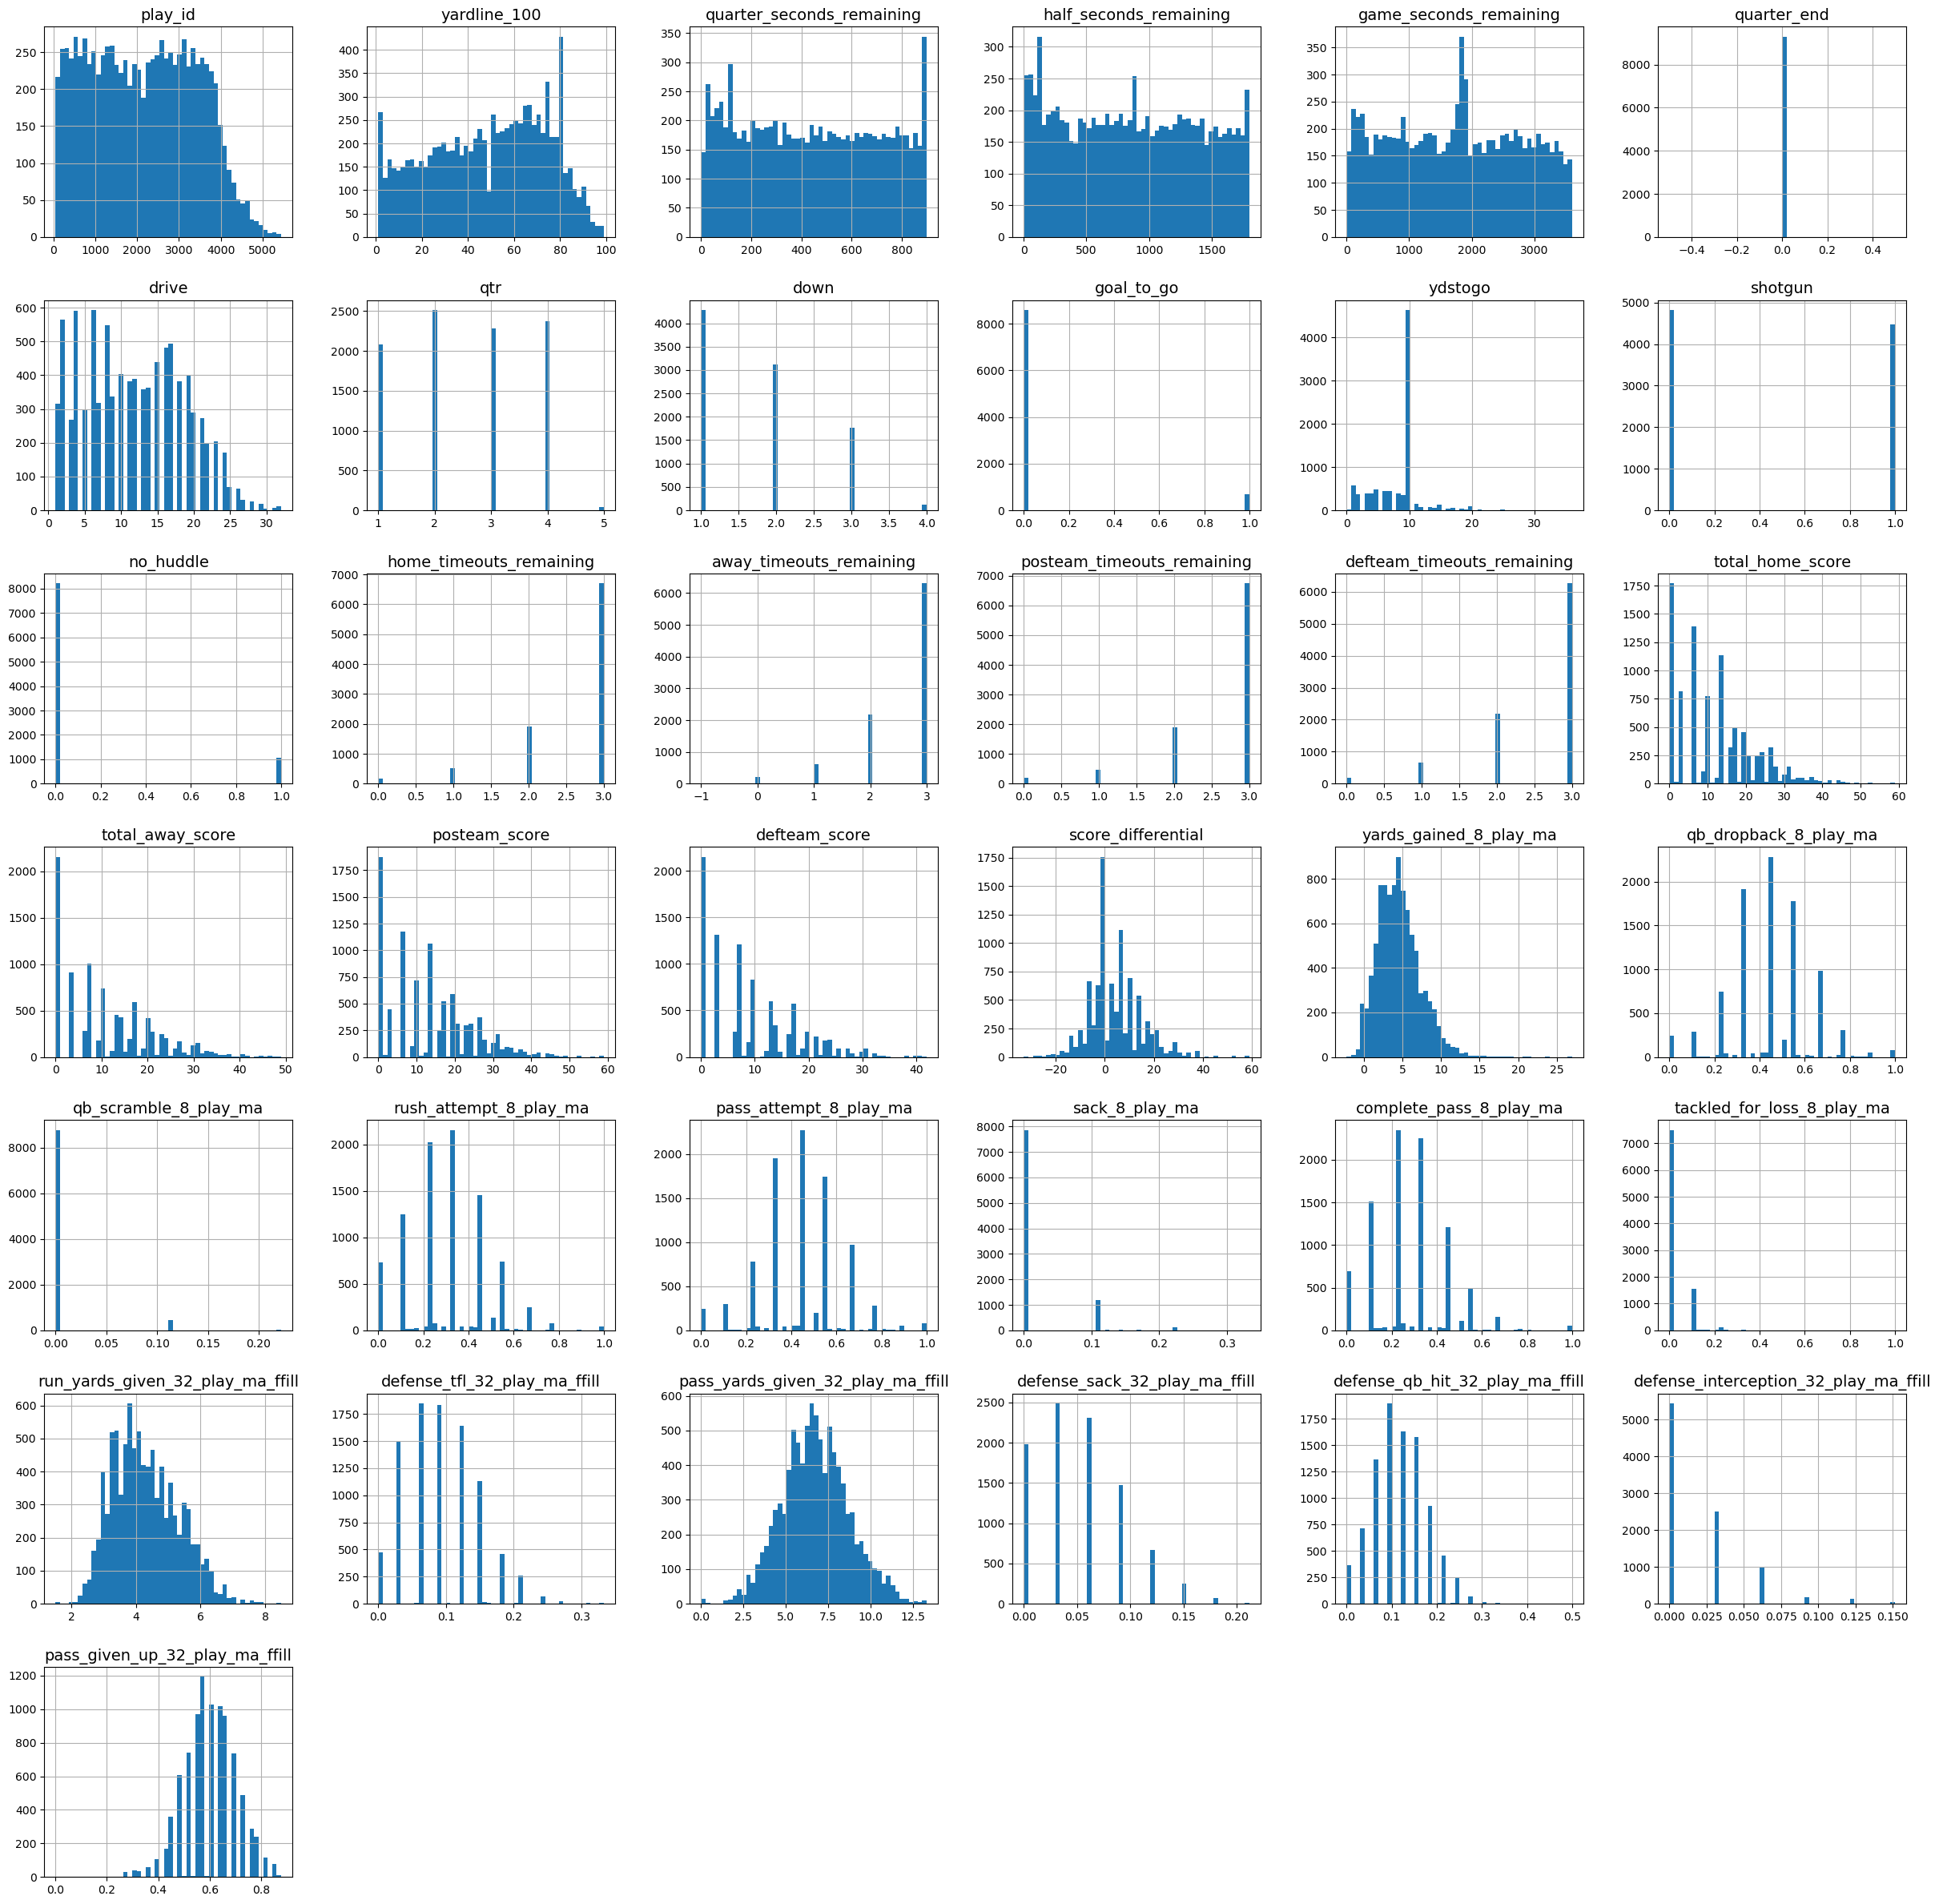

In [22]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=8)
plt.rc('axes', labelsize=10, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

nfl_df.hist(bins=50, figsize=(30, 30))
plt.show()

# Explore and Visualize

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


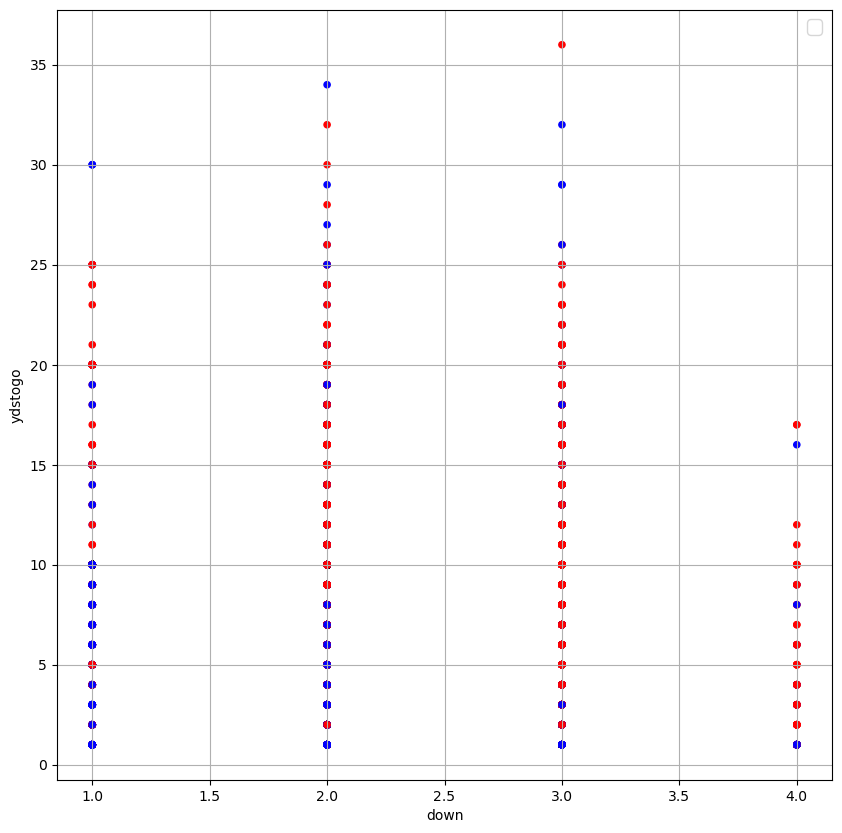

In [46]:
# Scatterplots

# yardline_100 vs. game_seconds_remaining, with the color representing the play_type

play_type_colors = { 'pass': 'red', 'run': 'blue', 'qb_spike': 'yellow' }

nfl_df\
.plot(kind='scatter',
             x='down', 
             y='ydstogo',
             grid=True,
             c=nfl_df['play_type'].apply(lambda x: play_type_colors[x]),
             figsize=(10, 10))

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


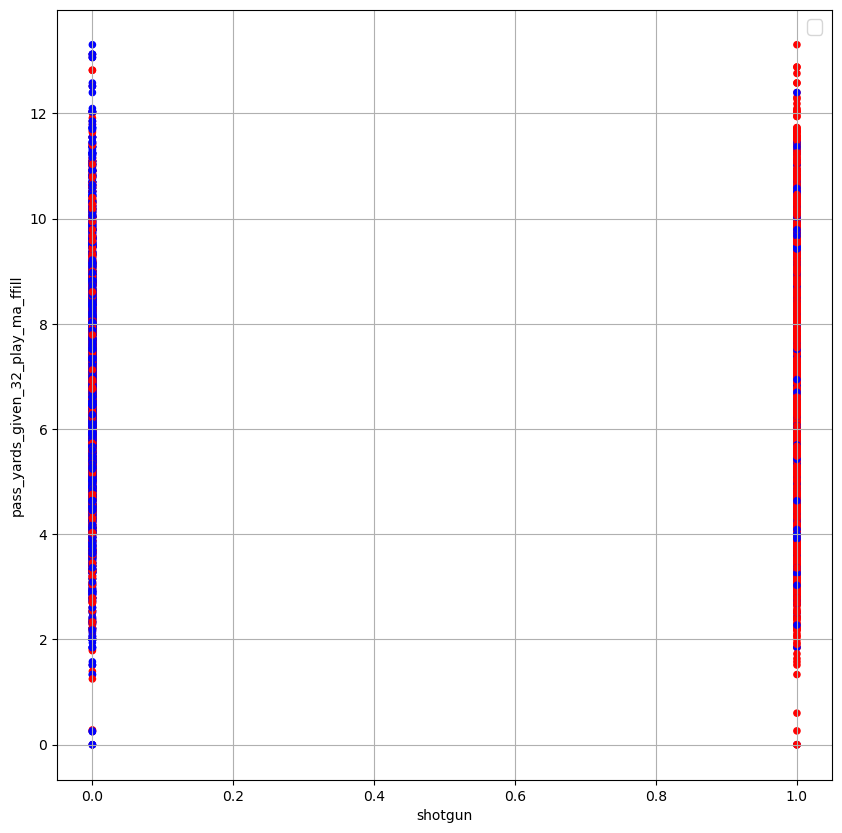

In [ ]:
# Scatterplots

# yardline_100 vs. game_seconds_remaining, with the color representing the play_type

play_type_colors = { 'pass': 'red', 'run': 'blue', 'qb_spike': 'yellow' }

nfl_df\
.plot(kind='scatter',
             x='shotgun', 
             y='pass_yards_given_32_play_ma_ffill',
             grid=True,
             c=nfl_df['play_type'].apply(lambda x: play_type_colors[x]),
             figsize=(10, 10))

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


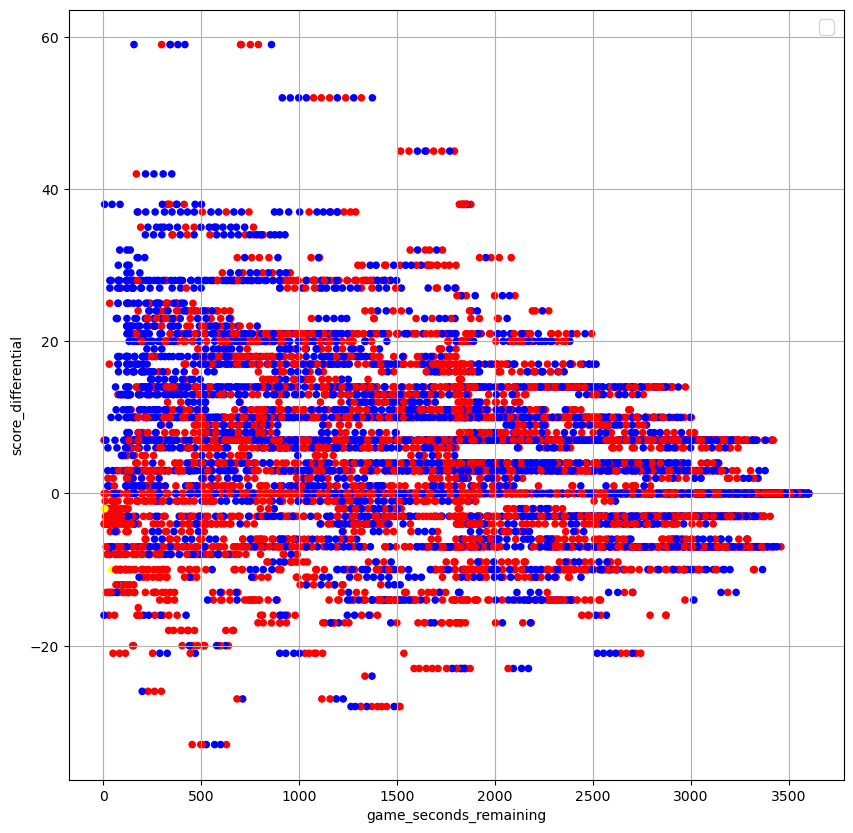

In [ ]:
# Scatterplots

# yardline_100 vs. game_seconds_remaining, with the color representing the play_type

play_type_colors = { 'pass': 'red', 'run': 'blue', 'qb_spike': 'yellow' }

nfl_df\
.plot(kind='scatter',
             x='game_seconds_remaining', 
             y='score_differential',
             grid=True,
             c=nfl_df['play_type'].apply(lambda x: play_type_colors[x]),
             figsize=(10, 10))

plt.legend()